In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_excel("../../../../Platzi_Data_Scientist/PowerBI/Proyecto_Macro/Crecimiento_PIB_Percapita.xls")

In [15]:
df.head()

2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
3,Aruba,ABW,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.635318,-0.709567,2.885166,1.515938,4.917139,4.738330,0.181216,-18.698324,17.225300,NaN
4,NaN,AFE,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,-2.342974,5.093992,2.330796,1.724021,2.436215,...,1.400457,1.186759,0.166840,-0.490259,-0.105886,-0.169822,-0.587557,-5.421662,1.683557,0.842507
5,Afganistán,AFG,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.002522,-0.964803,-1.666416,-0.345802,-0.253594,-1.688577,0.932833,-5.364666,-22.929194,NaN
6,NaN,AFW,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,-0.255511,1.592942,4.978710,3.130231,1.798761,...,3.257923,3.093635,0.026016,-2.519274,-0.382691,0.140162,0.563580,-3.453124,1.372160,1.192668
7,Angola,AGO,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,1.106331,1.030729,-2.642975,-6.011891,-3.630695,-4.676670,-4.017114,-8.672432,-1.954598,-0.096755


In [8]:
df.shape

(269, 67)

In [14]:
#df = df.iloc[2:]
df = df.iloc[1:]

In [12]:
df.columns = df.iloc[0]

In [16]:



# Melt para convertir las columnas de años en filas
df_melted = pd.melt(df, id_vars=df.columns[:5], var_name='Año', value_name='Valor')

# Eliminar las filas con NaN en la columna 'Valor'
df_melted = df_melted.dropna(subset=['Valor'])

# Guardar el nuevo DataFrame
#df_melted.to_csv('nuevo_archivo_organizado.csv', index=False)


In [24]:
"""df_melted= df_melted.drop(1960.0, axis=  1)
df_melted= df_melted.drop("Indicator Code", axis=  1)"""
df_melted= df_melted.drop("Indicator Name", axis=  1)


In [27]:
df_melted= df_melted.rename(columns={"Valor":"Crecimiento del PIB per cápita (% anual)"})

In [28]:
df_melted.head()

,Country Name,Country Code,Año,Crecimiento del PIB per cápita (% anual)
1,NaN,AFE,1961.0,-2.342974
3,NaN,AFW,1961.0,-0.255511
9,Argentina,ARG,1961.0,3.740903
13,Australia,AUS,1961.0,0.463671
14,Austria,AUT,1961.0,4.960717


In [31]:
df_melted.to_csv("../../../../Platzi_Data_Scientist/PowerBI/Proyecto_Macro/Crecimiento_PIB_Percapita_clean.csv", index=False)

In [38]:
df_melted.describe().T

,count,mean,std,min,25%,50%,75%,max
Crecimiento del PIB per cápita (% anual),12730.0,1.95934,5.694775,-64.425841,-0.149902,2.131587,4.342585,140.480042


In [40]:
conteo = df_melted.value_counts()
conteo

Country Name                                        Country Code  Año     Crecimiento del PIB per cápita (% anual)
 Ingreso mediano                                    MIC           1961.0  -0.229112                                   1
Oriente Medio y Norte de África (BIRF y la AIF)     TMN           1970.0   5.934241                                   1
                                                                  1972.0   10.548656                                  1
                                                                  1973.0   2.903553                                   1
                                                                  1974.0   3.526341                                   1
                                                                                                                     ..
Fiji                                                FJI           1970.0   10.421034                                  1
                                             

In [33]:

# Crear un DataFrame de ejemplo
data = {'fruta': ['manzana', 'naranja', 'manzana', 'plátano', 'naranja', 'manzana']}
df = pd.DataFrame(data)

# Utilizar value_counts para contar la frecuencia de cada valor único en la columna 'fruta'
conteo_frutas = df['fruta'].value_counts()

print(conteo_frutas)


manzana    3
naranja    2
plátano    1
Name: fruta, dtype: int64


# Nuevo Dataset: National Accounts Main Aggregates Database

Data Set Information:
The dataset is compiled from the National Accounts Main Aggregates Database that presents a series of analytical national accounts tables from 1970 onwards for more than 200 countries and areas of the world. It is the product of a global cooperation effort between the Economic Statistics Branch of the United Nations Statistics Division, international statistical agencies, and the national statistical services of these countries and is developed in accordance with the recommendation of the Statistical Commission at its first session in 1947 that the Statistics Division should publish regularly the most recent available data on national accounts for as many countries and areas as possible.

This dataset can be used to perform clustering, regression, and time series tasks.

In [19]:
df_global = pd.read_csv("../Data/Global Economy Indicators.csv")
df_global.shape

(10512, 26)

In [11]:
df_global.head()

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,195277226.0,370146827.0,376690811.0,127747843.0,1.731454e+09,83917200.0,226387091.0,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,276296480.0,387549502.0,394401164.0,133754097.0,1.812857e+09,87860382.0,237019196.0,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,290370350.0,352284669.0,358512865.0,121582672.0,1.647918e+09,79864525.0,215477287.0,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,262962880.0,364010279.0,370445793.0,125630236.0,1.702735e+09,82528885.0,222624293.0,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,305679151.0,440760406.0,448552790.0,152119162.0,2.061752e+09,99918604.0,269525910.0,2.106420e+09,2.061729e+09


In [12]:
df_global.memory_usage("deep")

Index                                                                                           128
 CountryID                                                                                    84096
 Country                                                                                      84096
 Year                                                                                         84096
 AMA exchange rate                                                                            84096
 IMF based exchange rate                                                                      84096
 Population                                                                                   84096
 Currency                                                                                     84096
 Per capita GNI                                                                               84096
 Agriculture, hunting, forestry, fishing (ISIC A-B)                                           84096


In [7]:
df_global.describe().T

,count,mean,std,min,25%,50%,75%,max
CountryID,10512.0,4.311166e+02,2.511691e+02,4.000000e+00,2.120000e+02,4.300000e+02,6.430000e+02,8.940000e+02
Year,10512.0,1.996263e+03,1.490036e+01,1.970000e+03,1.984000e+03,1.997000e+03,2.009000e+03,2.021000e+03
AMA exchange rate,10512.0,3.573959e+02,2.291128e+03,4.300000e-14,1.000000e+00,2.812895e+00,5.134316e+01,1.116366e+05
IMF based exchange rate,10512.0,3.419846e+02,1.941857e+03,4.300000e-14,1.000000e+00,2.761315e+00,4.806684e+01,4.200000e+04
Population,10512.0,2.851523e+07,1.141296e+08,4.359000e+03,6.330615e+05,5.051556e+06,1.678862e+07,1.425893e+09
Per capita GNI,10512.0,8.965565e+03,1.707021e+04,3.400000e+01,7.300000e+02,2.316500e+03,8.965750e+03,2.343170e+05
"Agriculture, hunting, forestry, fishing (ISIC A-B)",10391.0,7.793212e+09,4.034349e+10,2.813900e+04,1.304522e+08,9.313674e+08,4.023326e+09,1.350000e+12
Changes in inventories,8671.0,1.626543e+09,8.932353e+09,-1.510000e+11,4.673545e+05,6.829635e+07,6.910750e+08,2.110000e+11
Construction (ISIC F),10512.0,1.002199e+10,4.985596e+10,1.577280e+05,6.815523e+07,3.717701e+08,2.815730e+09,1.240000e+12
Exports of goods and services,10491.0,4.671176e+10,1.748857e+11,-1.669759e+09,4.026725e+08,2.407906e+09,1.542492e+10,3.530000e+12


## Data Clean: 

### Valores nulos

In [13]:
df_global.isnull().sum()

 CountryID                                                                                       0
 Country                                                                                         0
 Year                                                                                            0
 AMA exchange rate                                                                               0
 IMF based exchange rate                                                                         0
 Population                                                                                      0
 Currency                                                                                        0
 Per capita GNI                                                                                  0
 Agriculture, hunting, forestry, fishing (ISIC A-B)                                            121
 Changes in inventories                                                                       1841
 Construct

In [15]:
#borramos las filas con valores nulos
df_global.dropna(axis=0, inplace= True)

In [20]:
df_global.shape

(10512, 26)

In [16]:
df_global.isnull().sum()

 CountryID                                                                                    0
 Country                                                                                      0
 Year                                                                                         0
 AMA exchange rate                                                                            0
 IMF based exchange rate                                                                      0
 Population                                                                                   0
 Currency                                                                                     0
 Per capita GNI                                                                               0
 Agriculture, hunting, forestry, fishing (ISIC A-B)                                           0
 Changes in inventories                                                                       0
 Construction (ISIC F)                  

In [17]:
df_global.head()

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
52,8,Albania,1970,5.0,5.0,2324731,Lek,975,864793402.0,57793232.0,...,1.312561e+09,504595820.0,394647786.0,794665515.0,188952171.0,2.345798e+09,45739633.0,212298036.0,2.267360e+09,2.265577e+09
53,8,Albania,1971,5.0,5.0,2389812,Lek,976,889758995.0,59074883.0,...,1.350287e+09,519031885.0,406050295.0,817625694.0,194253684.0,2.413182e+09,47022973.0,218254570.0,2.332419e+09,2.330585e+09
54,8,Albania,1972,5.0,5.0,2455171,Lek,977,915350702.0,60818843.0,...,1.389164e+09,533991647.0,417663130.0,841009277.0,199867591.0,2.482484e+09,48381941.0,224562082.0,2.399403e+09,2.397526e+09
55,8,Albania,1973,5.0,5.0,2520436,Lek,979,941147592.0,63668482.0,...,1.428760e+09,549392880.0,429539992.0,864924791.0,205932186.0,2.553736e+09,49849969.0,231376034.0,2.468450e+09,2.466543e+09
56,8,Albania,1974,5.0,5.0,2585452,Lek,982,969063811.0,63077388.0,...,1.470097e+09,564865686.0,442272785.0,890563577.0,211067032.0,2.627172e+09,51092986.0,237145264.0,2.539022e+09,2.537016e+09


In [21]:
df_global.to_csv("../Data/Global Economy Indicators Clean.csv")

# Job Employee

Importamos el dataset

In [35]:
employee = pd.read_csv("../../../../../Downloads/TechSolutionsInc.csv")

In [36]:
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [24]:
employee.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [25]:
employee.shape

(1470, 35)

In [47]:
employee["Attrition"].replace({"Yes":1, "No":0}, inplace = True)

In [48]:
employee.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.00,0.0,0.00,1.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0


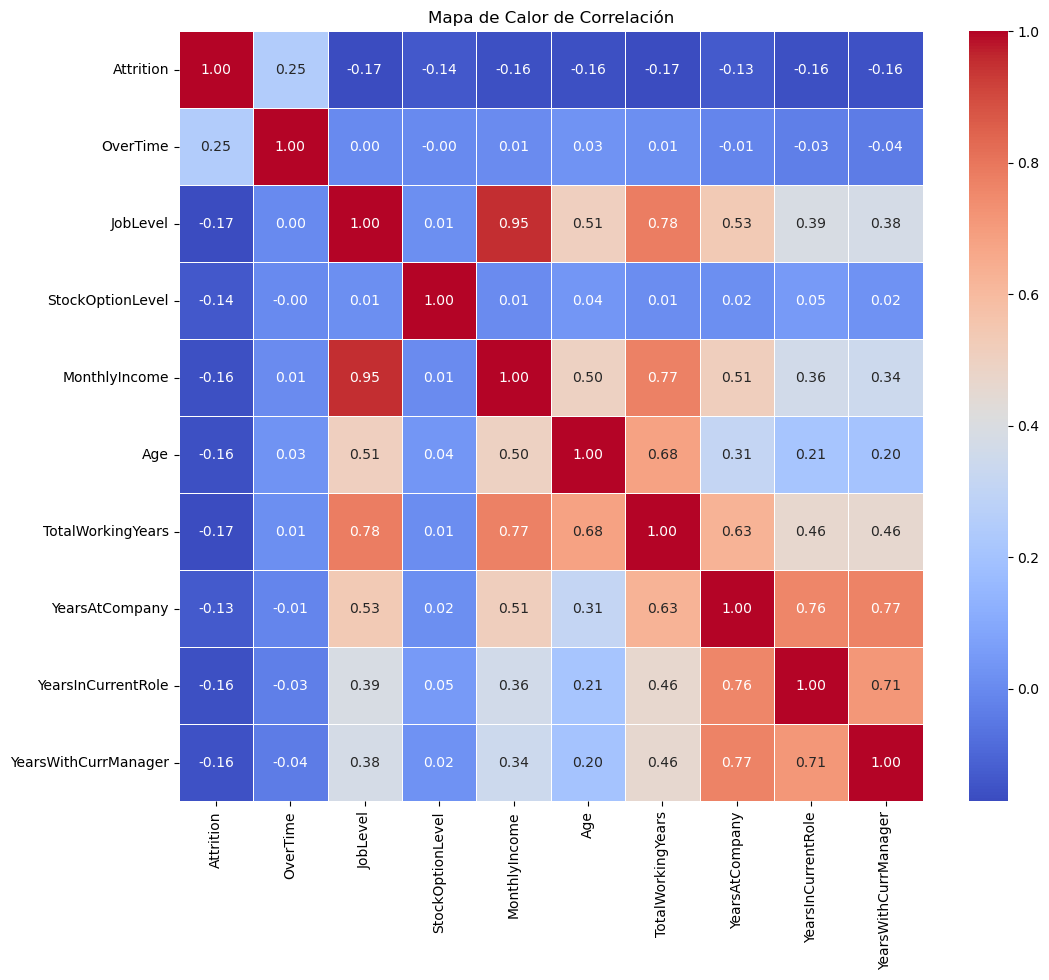

In [85]:
# Cargar tu conjunto de datos
# df = pd.read_csv("tu_archivo.csv")

# Calcular la matriz de correlación
correlation_matrix = employee_clean.corr()

# Crear un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Mapa de Calor de Correlación")
plt.show()

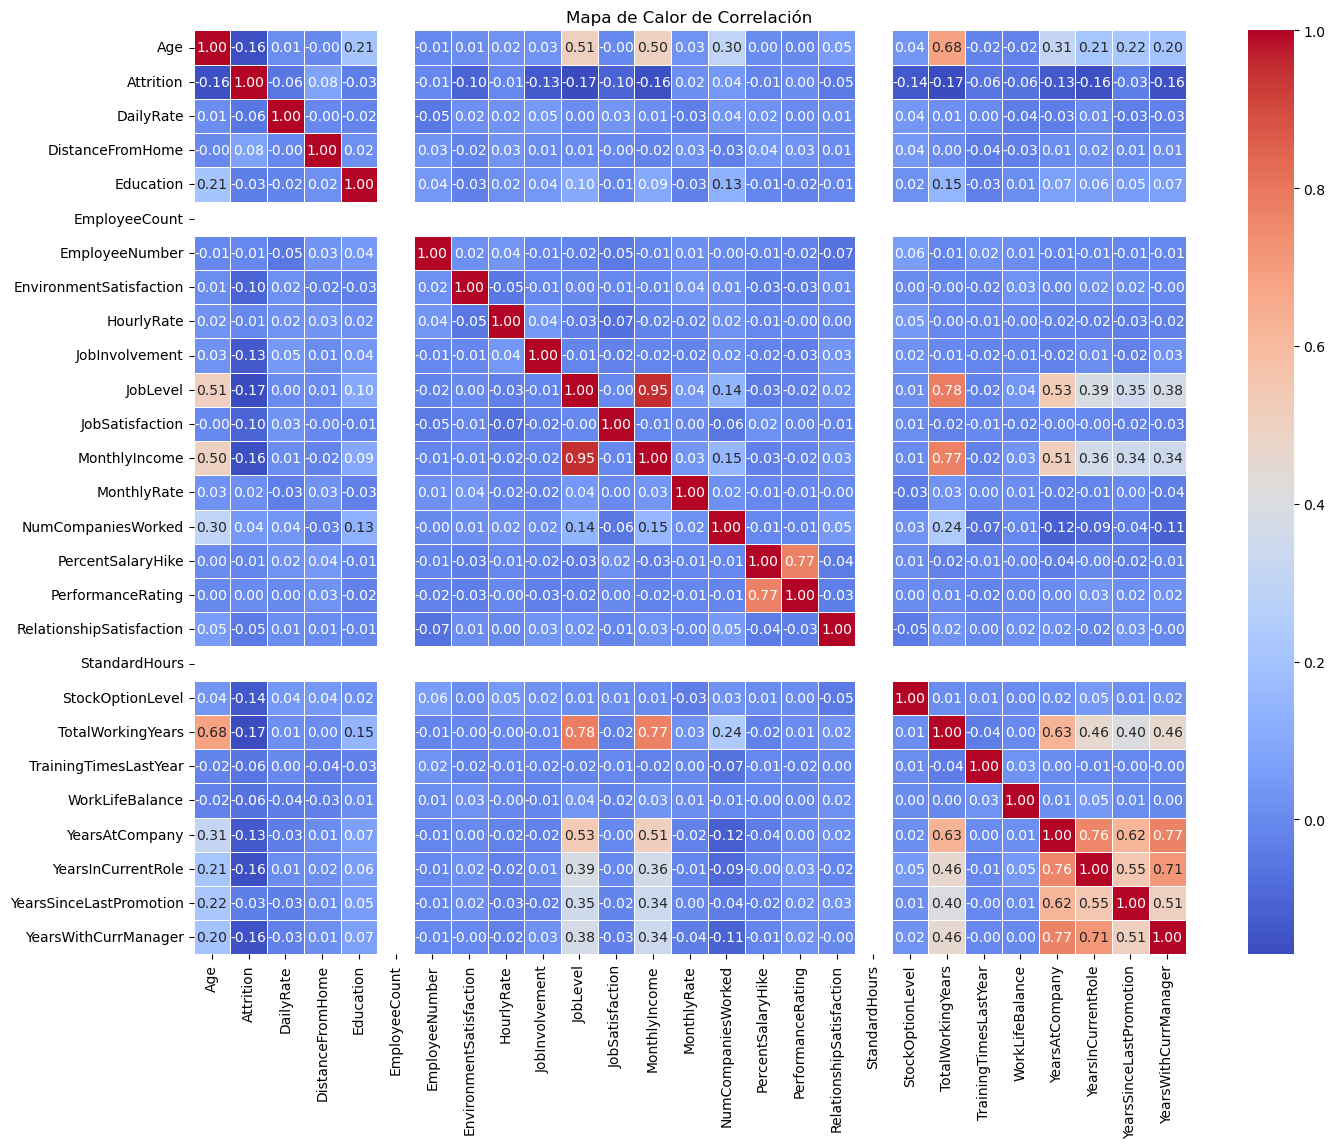

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar tu conjunto de datos
# df = pd.read_csv("tu_archivo.csv")

# Calcular la matriz de correlación
correlation_matrix = employee.corr()

# Crear un mapa de calor
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Mapa de Calor de Correlación")
plt.show()

In [31]:
employee_clean = employee[columnas_select]

In [30]:
columnas_select = ["Attrition",
"OverTime",
"JobLevel",
"StockOptionLevel",
"MonthlyIncome",
"Age",
"TotalWorkingYears",
"YearsAtCompany",
"JobRole",
"MaritalStatus",
"YearsInCurrentRole",
"YearsWithCurrManager"]

In [42]:
employee_clean["Attrition"].replace({"Yes":1, "No":0}, inplace = True)

In [53]:
employee_clean["OverTime"].replace({"Yes":1, "No":0}, inplace = True)

In [56]:
employee_clean["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [89]:
employee_clean.head()

,Attrition,OverTime,JobLevel,StockOptionLevel,MonthlyIncome,Age,TotalWorkingYears,YearsAtCompany,JobRole,MaritalStatus,YearsInCurrentRole,YearsWithCurrManager
0,1,1,2,0,5993,41,8,6,Sales Executive,Single,4,5
1,0,0,2,1,5130,49,10,10,Research Scientist,Married,7,7
2,1,1,1,0,2090,37,7,0,Laboratory Technician,Single,0,0
3,0,1,1,0,2909,33,8,8,Research Scientist,Married,7,0
4,0,0,1,1,3468,27,6,2,Laboratory Technician,Married,2,2


In [70]:
# Aplicar one-hot encoding a la columna "Categoria"
df_encoded = pd.get_dummies(employee_clean, columns=['MaritalStatus', 'JobRole'], prefix=['MaritalStatus', 'JobRole'])

# Visualizar el resultado
print(df_encoded)

print(df_encoded)


      Attrition  OverTime  JobLevel  StockOptionLevel  MonthlyIncome  Age  \
0             1         1         2                 0           5993   41   
1             0         0         2                 1           5130   49   
2             1         1         1                 0           2090   37   
3             0         1         1                 0           2909   33   
4             0         0         1                 1           3468   27   
...         ...       ...       ...               ...            ...  ...   
1465          0         0         2                 1           2571   36   
1466          0         0         3                 1           9991   39   
1467          0         1         2                 1           6142   27   
1468          0         0         2                 0           5390   49   
1469          0         0         2                 0           4404   34   

      TotalWorkingYears  YearsAtCompany  YearsInCurrentRole  \
0           

In [88]:
df_encoded.head()

,Attrition,OverTime,JobLevel,StockOptionLevel,MonthlyIncome,Age,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,...,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,1,1,2,0,5993,41,8,6,4,5,...,1,0,0,0,0,0,0,0,1,0
1,0,0,2,1,5130,49,10,10,7,7,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,0,2090,37,7,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,0,1,1,0,2909,33,8,8,7,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,3468,27,6,2,2,2,...,0,0,0,1,0,0,0,0,0,0


In [74]:
df_encoded.shape

(1470, 22)

In [75]:
df_encoded.to_csv("../../../../../Downloads/TechSolutionsInc_Clean.csv", index="False")

### Importamos librerías y hacemos split del DF para entrenar modelos

In [77]:

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Carga tu dataset
# Supongamos que tienes un DataFrame llamado df y tu variable objetivo es 'target'
X = df_encoded.drop('Attrition', axis=1)  # Características
y = df_encoded['Attrition']  # Variable objetivo


### Oversampling

In [80]:

# Supongamos que X y y son tus características y variable objetivo, respectivamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define el pipeline con oversampling y undersampling
pipeline = Pipeline([
    ('oversample', SMOTE(sampling_strategy=0.5)),
    ('undersample', RandomUnderSampler(sampling_strategy=1.0)),
])

# Aplica el pipeline solo al conjunto de entrenamiento
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Supongamos que ya tienes X_resampled, y_resampled del paso anterior

# Inicializa varios modelos
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    # Agrega más modelos según lo desees
}

# Entrena y evalúa cada modelo
for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    print(f"\n{name}:\n{classification_report(y_test, y_pred)}")



RandomForest:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       255
           1       0.25      0.18      0.21        39

    accuracy                           0.82       294
   macro avg       0.56      0.55      0.55       294
weighted avg       0.80      0.82      0.81       294


LogisticRegression:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       255
           1       0.23      0.33      0.27        39

    accuracy                           0.76       294
   macro avg       0.56      0.58      0.56       294
weighted avg       0.80      0.76      0.78       294



c:\Users\GAMM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Undersampling

In [82]:
# Supongamos que X y y son tus características y variable objetivo, respectivamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define el pipeline con oversampling y undersampling
pipeline = Pipeline([
    ('undersample', RandomUnderSampler(sampling_strategy=1.0)),
])

# Aplica el pipeline solo al conjunto de entrenamiento
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [83]:
# Supongamos que ya tienes X_resampled, y_resampled del paso anterior

# Inicializa varios modelos
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    # Agrega más modelos según lo desees
}

# Entrena y evalúa cada modelo
for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    print(f"\n{name}:\n{classification_report(y_test, y_pred)}")


RandomForest:
              precision    recall  f1-score   support

           0       0.90      0.66      0.76       255
           1       0.19      0.51      0.27        39

    accuracy                           0.64       294
   macro avg       0.54      0.59      0.52       294
weighted avg       0.80      0.64      0.70       294


LogisticRegression:
              precision    recall  f1-score   support

           0       0.90      0.58      0.70       255
           1       0.17      0.56      0.26        39

    accuracy                           0.58       294
   macro avg       0.53      0.57      0.48       294
weighted avg       0.80      0.58      0.65       294



c:\Users\GAMM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
